# Distribution B - Maximum Likelihood - Expected Likelihood

In [34]:
import DistExampB as db
from matplotlib import pyplot as plot
import sympy as sp

import MlePdf

from engineering_notation import EngNumber as EngrNum
from math import exp, log, pi
from numpy import sinc
from statistics import mean

from LocUtil import Grid1, MinMax, SetSeed, UnZip
from LocMath import Interp1
from Map import LogRatio
from Sinc import SincApprox

In [3]:
nPlot = 101
givenSeed = None

## Setup

In [4]:
dist = db.ExampB()

In [5]:
xSym = sp.Symbol('x')
zSym = sp.Symbol('z')
map_ = LogRatio(xSym,zSym, xRange=(0,2))
map_.forSym

log(x/(2 - x))

In [6]:
X2Z = map_.Forward
Z2X = map_.Inverse

### Solve

In [7]:
nSamp = 200

In [8]:
seed = SetSeed(givenSeed)
if givenSeed is None:
	print(f'seed = {seed}')

In [9]:
sampX = tuple(dist.Sample() for _ in range(nSamp))
MinMax(tuple(X2Z(x) for x in sampX))

(-2.0319831477776042, 2.989586978546609)

In [10]:
nSincRange = (3,5,7,11,13)

In [11]:
dist.pdfSym

3*x*(1 - cos(3*pi*x/2))*(2 - x)/4

In [36]:
logLikeExp = sp.Integral(sp.log(dist.pdfSym) * dist.pdfSym, (xSym, 0,2)).evalf()
logLikeExp

-0.2727900

## Validate

In [24]:
logLike = tuple(log(dist.Pdf(x)) for x in sampX)

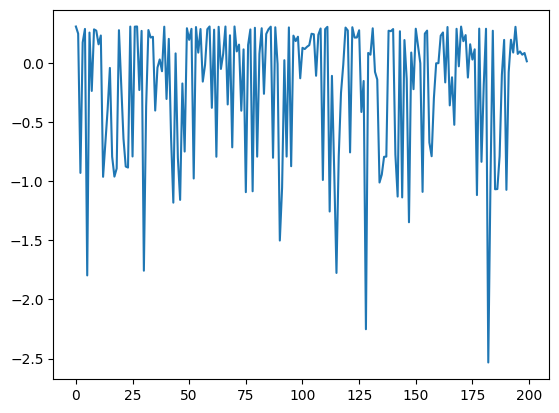

In [25]:
plot.plot(logLike)

In [31]:
temp = MinMax(logLike)

In [33]:
tuple(map(exp, temp))

(0.07941044541862949, 1.360685813695983)

In [35]:
mean(logLike)

-0.20372505317135375

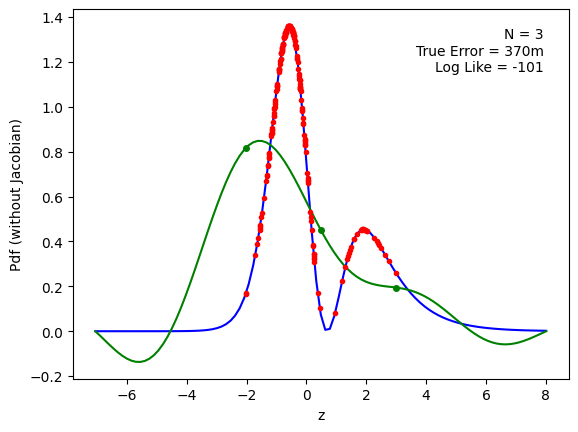

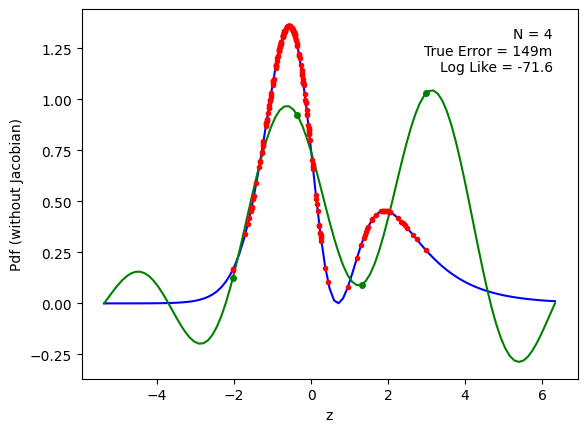

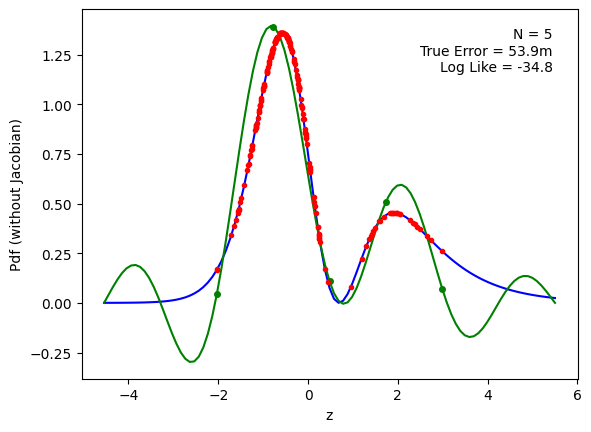

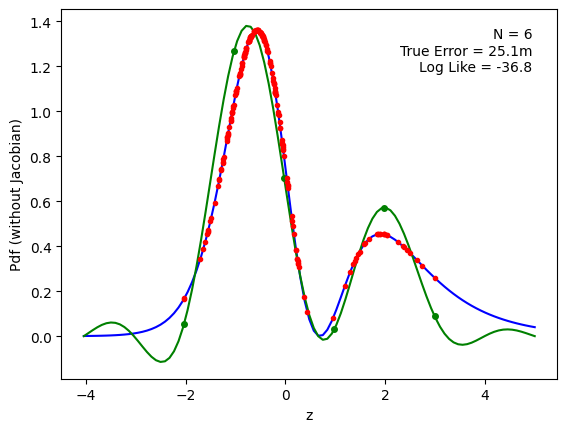

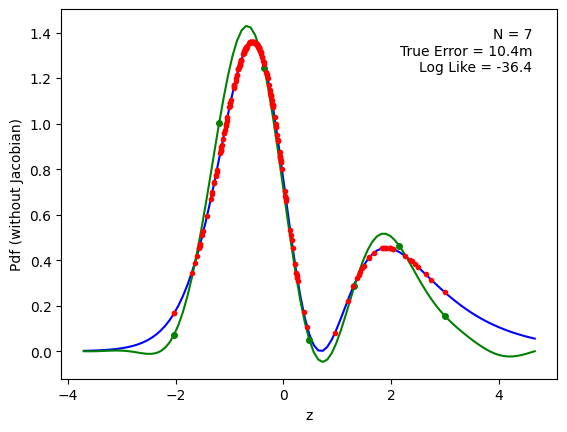

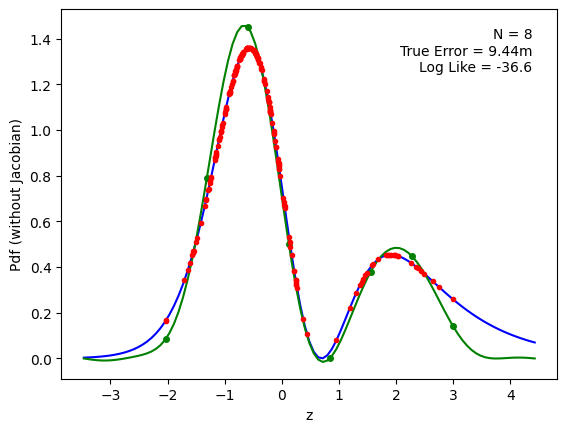

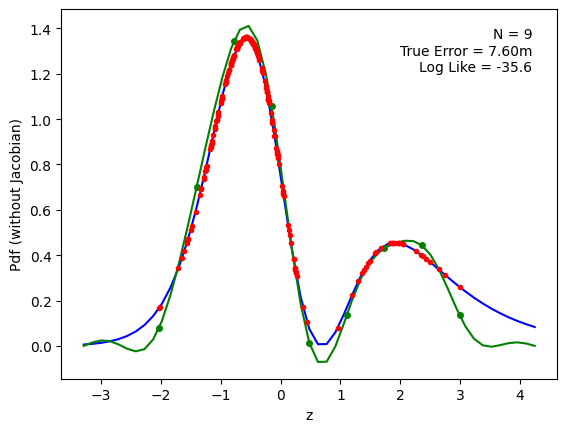

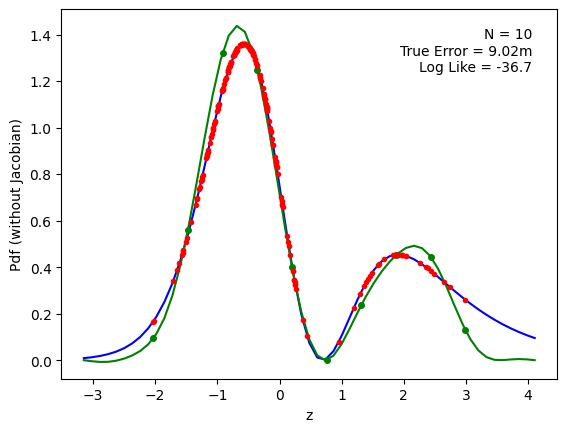

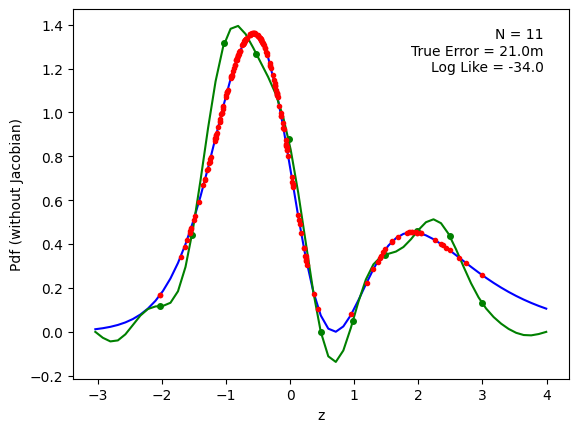

F:\Users\Kenne.DESKTOP-BT6VROU\AppData\Local\Programs\Python\Python312\Lib\site-packages\cvxpy\problems\problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


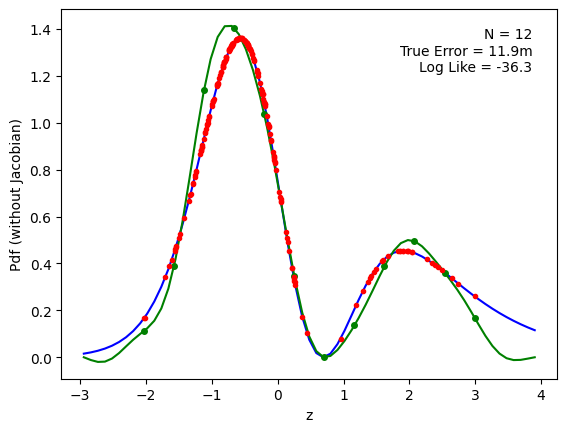

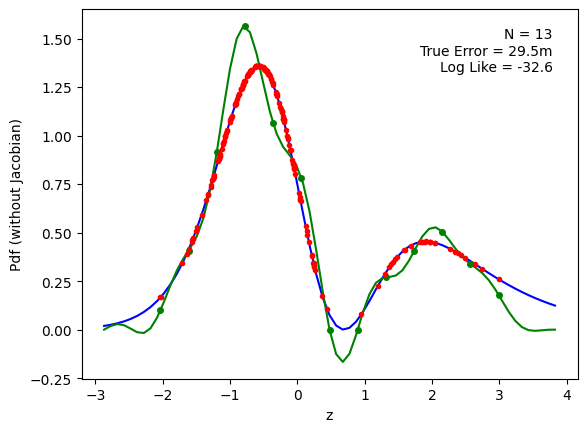

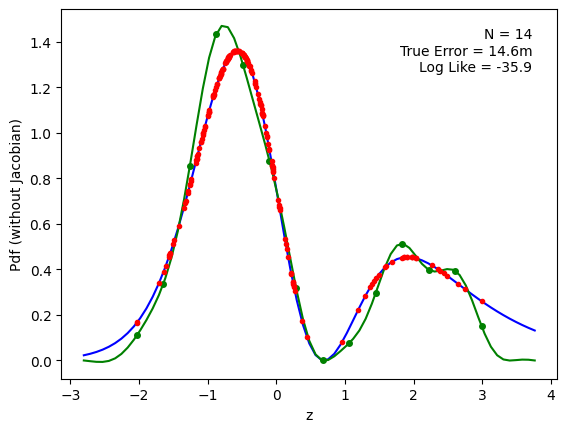

In [10]:
info = []

for nSinc in nSincRange:
	# compute MLE
	pdfApprox = MlePdf.Sinc(sampX, map_, nSinc)
	
	# get errors of est
	rmsErr,rmsInfo = MlePdf.RmsDiff(pdfApprox, dist.Pdf)
	logLike = MlePdf.EstLogLike(pdfApprox, sampX)
	
	# plot
	text = (		
		f'N = {nSinc}\n'
		f'True Error = {EngrNum(rmsErr, significant=3)}\n'
		f'Log Like = {EngrNum(logLike, significant=3)}'
	)
	
	# fig,ax = plot.subplots(figsize=(9, 6.5))
	MlePdf.PlotPdfEstZ(pdfApprox, dist.Pdf, sampX, text)
	plot.show()
	
	# accumulate results
	info.append([nSinc, seed, [rmsErr, rmsInfo, logLike]])

### Graph

Text(0.5, 0, 'n')

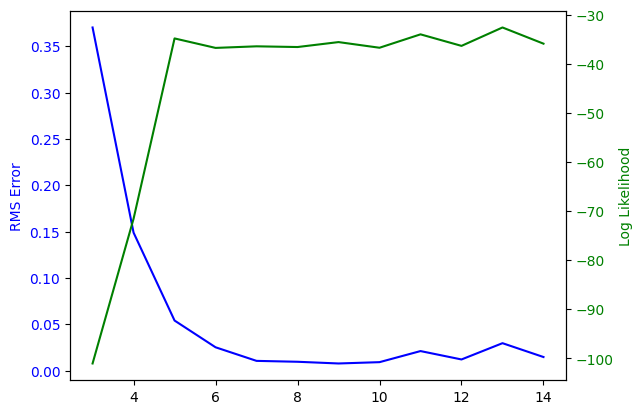

In [11]:
fix,ax0 = plot.subplots()

n,_,fitInfo = UnZip(info)
rmsErr,_,logLike = UnZip(fitInfo)

ax0.plot(n,rmsErr, c='blue')
ax0.set_ylabel('RMS Error', c='blue')
ax0.tick_params(axis='y', labelcolor='blue')

ax1 = ax0.twinx()
ax1.plot(n,logLike, c='green')
ax1.set_ylabel('Log Likelihood', c='green')
ax1.tick_params(axis='y', labelcolor='green')

plot.xlabel('n')